### Measuring correlations between trip flows X points of interest of Boston metro area
##### This notebook compares number of trips per grid cell and points of interest from Google Places. 
##### Different from the [Correlations](Correlations.ipynb) notebook, we use absolute values of POIs per grid cell
##### We use Pearson's correlation coefficient and predictive power score in this comparison. 
##### Questions:
* How is the correlation between a POI and the number of bike trips that start or end in the grid cells?
* How is the impact of independent variables on the correlation? The evaluated variables are: cell as origin or destination of the trips, grid size, day period, year period

In [1]:
import pandas as pd
import seaborn as sns
import ppscore as pps
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import bikescience.load_trips as tr
import bikescience.stations as st
import bikescience.grid as grid
import bikescience.flow as flow
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')

#### Auxiliary functions

In [2]:
def heatmap_corr(df):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(df, vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True)
    ax.set_title('Correlation matrix')
    return ax

def heatmap_pps(df):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title('PPS matrix')
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
    return ax

#### Loading trips

In [3]:
trips = tr.load_all_trips('../data/boston/bike-trips')
print(len(trips), 'trips')
stations = st.load('../data/boston/bike-stations/stations.geojson')
print(len(stations), 'stations')

9427775 trips
324 stations


#### Filtering trips

In [4]:
filtered_trips = trips

#only working days
filtered_trips = tr.working_days(filtered_trips)

# after a date
#filtered_trips = trips[trips.starttime >= pd.Timestamp('2018-01-01 00:00:0000')]

# between April and November of all years
#filtered_trips = trips[((trips.starttime >= pd.Timestamp('2018-04-01 00:00:0000')) & (trips.starttime < pd.Timestamp('2018-12-01 00:00:0000'))) | \
#                      ((trips.starttime >= pd.Timestamp('2019-04-01 00:00:0000')) & (trips.starttime < pd.Timestamp('2019-12-01 00:00:0000'))) | \
#                      ((trips.starttime >= pd.Timestamp('2017-04-01 00:00:0000')) & (trips.starttime < pd.Timestamp('2017-12-01 00:00:0000'))) | \
#                      ((trips.starttime >= pd.Timestamp('2016-04-01 00:00:0000')) & (trips.starttime < pd.Timestamp('2016-12-01 00:00:0000'))) | \
#                      ((trips.starttime >= pd.Timestamp('2015-04-01 00:00:0000')) & (trips.starttime < pd.Timestamp('2015-12-01 00:00:0000'))) | \
#                      ((trips.starttime >= pd.Timestamp('2014-04-01 00:00:0000')) & (trips.starttime < pd.Timestamp('2014-12-01 00:00:0000'))) | \
#                      ((trips.starttime >= pd.Timestamp('2013-04-01 00:00:0000')) & (trips.starttime < pd.Timestamp('2013-12-01 00:00:0000'))) | \
#                      ((trips.starttime >= pd.Timestamp('2012-04-01 00:00:0000')) & (trips.starttime < pd.Timestamp('2012-12-01 00:00:0000'))) ]
print(len(filtered_trips), 'trips')

7007719 trips


#### Creating the OD matrix

In [172]:
the_grid = grid.Grid(n=10)
od = flow.od_countings(filtered_trips, the_grid, stations)
od.drop(columns=['origin','destination'],inplace=True)
od.head()

/home/higor/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/higor/anaconda3/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(+init=epsg:4326 +type=crs != epsg:4326)
  "(%s != %s)" % (left_df.crs, right_df.crs)


i_start  j_start  i_end  j_end  trip counts
0        0       17      0     17           18
1        0       17      1     19           24
2        0       17      2     15            1
3        0       17      2     16            9
4        0       17      3     11            1

### POIs

In [173]:
base_folder = '../data/boston/training-sets/'
poi = pd.read_csv(base_folder + 'poi/absolute-poi-10x10.csv')

In [542]:
poi.columns

Index(['i', 'j', 'placement_id', 'dentist', 'health', 'doctor', 'accounting',
       'finance', 'school', 'gym',
       ...
       'bowling_alley', 'airport', 'mosque', 'amusement_park', 'embassy',
       'light_rail_station', 'political', 'campground', 'rv_park', 'zoo'],
      dtype='object', length=101)

#### Getting POIs per origin cells

In [175]:
poi_od_orig = poi.merge(od, left_on=['i', 'j'],right_on=['i_start','j_start'])
poi_od_orig.drop(columns=['i_start','j_start','i_end','j_end'],inplace=True)
poi_od_orig.head()

i   j  placement_id  dentist  health  doctor  accounting  finance  school  \
0  0  17             0        0      16       3           0        3       8   
1  0  17             0        0      16       3           0        3       8   
2  0  17             0        0      16       3           0        3       8   
3  0  17             0        0      16       3           0        3       8   
4  0  17             0        0      16       3           0        3       8   

   gym  ...  airport  mosque  amusement_park  embassy  light_rail_station  \
0    1  ...        0       0               0        0                   0   
1    1  ...        0       0               0        0                   0   
2    1  ...        0       0               0        0                   0   
3    1  ...        0       0               0        0                   0   
4    1  ...        0       0               0        0                   0   

   political  campground  rv_park  zoo  trip counts  
0          0           0        0    0           18  
1          0           0        0    0           24  
2          0           0        0    0            1  
3          0           0        0    0            9  
4          0           0        0    0            1  

[5 rows x 102 columns]

#### Getting POIs per destination cells

In [176]:
poi_od_dest = poi.merge(od, left_on=['i', 'j'],right_on=['i_end','j_end'])
poi_od_dest.drop(columns=['i_start','j_start','i_end','j_end'],inplace=True)
poi_od_dest.head()

i   j  placement_id  dentist  health  doctor  accounting  finance  school  \
0  0  17             0        0      16       3           0        3       8   
1  0  17             0        0      16       3           0        3       8   
2  0  17             0        0      16       3           0        3       8   
3  0  17             0        0      16       3           0        3       8   
4  0  17             0        0      16       3           0        3       8   

   gym  ...  airport  mosque  amusement_park  embassy  light_rail_station  \
0    1  ...        0       0               0        0                   0   
1    1  ...        0       0               0        0                   0   
2    1  ...        0       0               0        0                   0   
3    1  ...        0       0               0        0                   0   
4    1  ...        0       0               0        0                   0   

   political  campground  rv_park  zoo  trip counts  
0          0           0        0    0           18  
1          0           0        0    0           18  
2          0           0        0    0            8  
3          0           0        0    0            1  
4          0           0        0    0            2  

[5 rows x 102 columns]

#### Splitting POIs into groups

In [183]:
poi_group_1 = ['trips','dentist','health','doctor','accounting','finance','school','gym','cemetery','lawyer','park']
poi_group_2 = ['trips','premise','transit_station','furniture_store','home_goods_store','store','general_contractor','bus_station','university','real_estate_agency','beauty_salon']
poi_group_3 = ['trips','food','clothing_store','electrician','car_repair','storage','atm','bank','roofing_contractor','electronics_store','church']
poi_group_4 = ['trips','place_of_worship','hospital','restaurant','veterinary_care','funeral_home','parking','cafe','bakery','convenience_store','liquor_store']
poi_group_5 = ['trips','physiotherapist','car_dealer','pharmacy','insurance_agency','synagogue','gas_station','art_gallery','grocery_or_supermarket','shoe_store','hair_care']
poi_group_6 = ['trips','police','local_government_office','painter','subway_station','moving_company','spa','travel_agency','shopping_mall','florist','plumber']
poi_group_7 = ['trips','laundry','lodging','locksmith','fire_station','car_rental','bar','meal_delivery','meal_takeaway','hindu_temple','jewelry_store']
poi_group_8 = ['trips','library','natural_feature','train_station','department_store','supermarket','post_office','book_store','museum','pet_store','hardware_store']
poi_group_9 = ['trips','car_wash','night_club','stadium','movie_rental','city_hall','courthouse','movie_theater','bicycle_store','bowling_alley','airport']
poi_group_10 = ['trips','mosque','amusement_park','embassy','light_rail_station','political','campground','rv_park','zoo']
poi_group = poi_group_4

In [184]:
poi_aggs = {}
for c in poi_group:
    if c == 'trips':
        poi_aggs[c] = 'sum'
    else:
        poi_aggs[c] = 'first'
poi_aggs

{'trips': 'sum',
 'place_of_worship': 'first',
 'hospital': 'first',
 'restaurant': 'first',
 'veterinary_care': 'first',
 'funeral_home': 'first',
 'parking': 'first',
 'cafe': 'first',
 'bakery': 'first',
 'convenience_store': 'first',
 'liquor_store': 'first'}

#### Choosing origin or destination cells to correlate with POIs

In [185]:
poi_od = poi_od_dest.copy()
poi_od = poi_od.rename(columns={'trip counts': 'trips'})
poi_group.append('i')
poi_group.append('j')
poi_od = poi_od[poi_group]
poi_od.head()

trips  place_of_worship  hospital  restaurant  veterinary_care  \
0     18                10         0           1                0   
1     18                10         0           1                0   
2      8                10         0           1                0   
3      1                10         0           1                0   
4      2                10         0           1                0   

   funeral_home  parking  cafe  bakery  convenience_store  liquor_store  i   j  
0             0        2     0       0                  5             0  0  17  
1             0        2     0       0                  5             0  0  17  
2             0        2     0       0                  5             0  0  17  
3             0        2     0       0                  5             0  0  17  
4             0        2     0       0                  5             0  0  17

In [186]:
poi_od = poi_od.groupby(['i','j'], as_index=False).agg(poi_aggs)
poi_od.drop(columns=['i','j'],inplace=True)
poi_od.head(10)

trips  place_of_worship  hospital  restaurant  veterinary_care  \
0     87                10         0           1                0   
1    559                 2         0          22                0   
2   1090                 0         0           5                0   
3    939                 1         0           1                0   
4    351                 2         0           3                0   
5   9537                 2         0           7                0   
6  14886                 2         0           7                0   
7    626                 3         0           1                0   
8    729                 1         0           1                0   
9    720                 2         0           0                0   

   funeral_home  parking  cafe  bakery  convenience_store  liquor_store  
0             0        2     0       0                  5             0  
1             0        0     2       0                  2             0  
2             0        0     0       0                  0             0  
3             0        0     0       0                  0             1  
4             0        0     0       0                  2             0  
5             0        0     2       2                  0             0  
6             0        2     1       0                  0             1  
7             0        0     0       0                  0             0  
8             0        0     0       0                  0             0  
9             0        0     0       0                  0             0

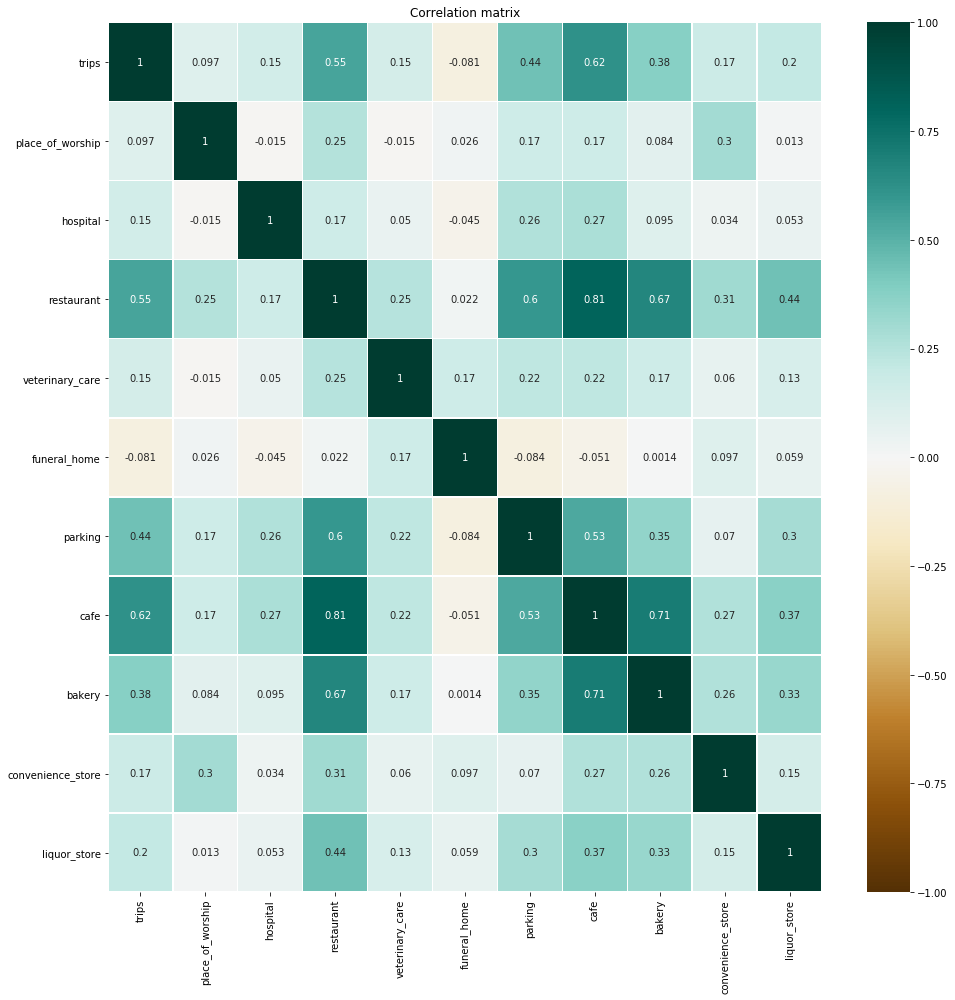

In [188]:
heatmap_corr(poi_od.corr())

/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_s

/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/home/higor/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_s

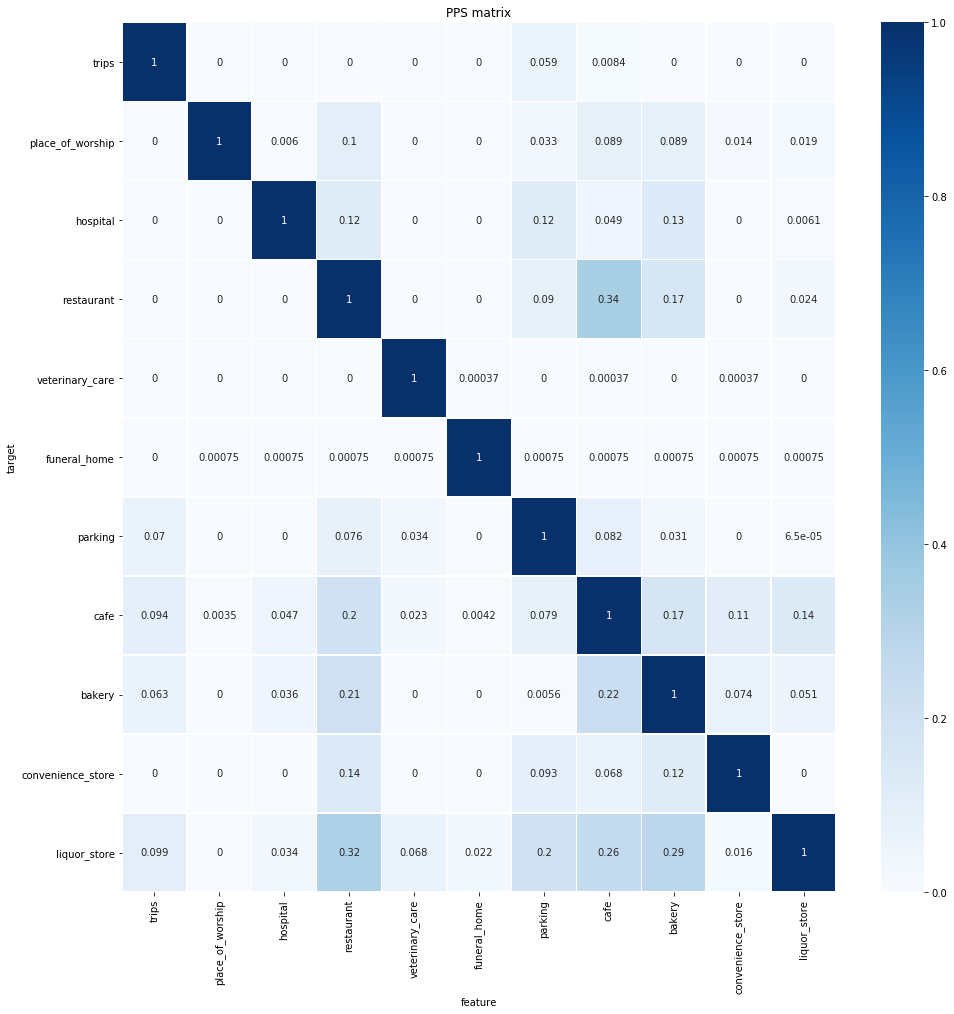

In [187]:
heatmap_pps(pps.matrix(poi_od))